In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
df = pd.read_csv("model-data.csv")
df

,postcode,latitude,longitude,bedrooms,bathrooms,property_type,price,postcode_property_count,public-service-duration,care-facility-duration,...,pri-1-10,pri-11-50,pri-51-100,pri-101-150,pri-150+,sec-1-10,sec-11-50,sec-51-100,sec-101-150,sec-150+
0,3029,-37.836800,144.681992,3,2,House,410.0,264,3.611667,3.186500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
1,3029,-37.858776,144.670990,4,2,House,420.0,264,3.611667,3.186500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
2,3029,-37.831726,144.721200,4,2,New House & Land,440.0,264,3.611667,3.186500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
3,3029,-37.850758,144.712234,3,3,House,415.0,264,3.611667,3.186500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
4,3029,-37.843980,144.717514,3,2,House,410.0,264,3.611667,3.186500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12122,3934,-38.248100,145.041611,3,2,Townhouse,625.0,13,14.985667,0.896667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
12123,3934,-38.285440,144.995331,4,2,House,720.0,13,14.985667,0.896667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
12124,3934,-38.250070,145.052078,4,2,House,700.0,13,14.985667,0.896667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
12125,3934,-38.290226,145.016418,3,2,House,870.0,13,14.985667,0.896667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [2]:
# Remove outlier
cols = ['price'] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.85)
print(Q1)
print(Q3)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df

price    395.0
Name: 0.25, dtype: float64
price    675.0
Name: 0.85, dtype: float64


,postcode,latitude,longitude,bedrooms,bathrooms,property_type,price,postcode_property_count,public-service-duration,care-facility-duration,...,pri-1-10,pri-11-50,pri-51-100,pri-101-150,pri-150+,sec-1-10,sec-11-50,sec-51-100,sec-101-150,sec-150+
0,3029,-37.836800,144.681992,3,2,House,410.0,264,3.611667,3.186500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
1,3029,-37.858776,144.670990,4,2,House,420.0,264,3.611667,3.186500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
2,3029,-37.831726,144.721200,4,2,New House & Land,440.0,264,3.611667,3.186500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
3,3029,-37.850758,144.712234,3,3,House,415.0,264,3.611667,3.186500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
4,3029,-37.843980,144.717514,3,2,House,410.0,264,3.611667,3.186500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12121,3934,-38.283810,145.007889,4,2,House,900.0,13,14.985667,0.896667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
12122,3934,-38.248100,145.041611,3,2,Townhouse,625.0,13,14.985667,0.896667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
12123,3934,-38.285440,144.995331,4,2,House,720.0,13,14.985667,0.896667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
12124,3934,-38.250070,145.052078,4,2,House,700.0,13,14.985667,0.896667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [3]:
y = df["price"].values
df = df.drop(columns=["price"])
df = pd.get_dummies(data=df, columns=['property_type'], drop_first=True)
df = abs(df)
X = df.values
df

,postcode,latitude,longitude,bedrooms,bathrooms,postcode_property_count,public-service-duration,care-facility-duration,shopping-center-duration,train-station-duration,...,property_type_House,property_type_New Apartments / Off the Plan,property_type_New House & Land,property_type_Penthouse,property_type_Rural,property_type_Semi-Detached,property_type_Studio,property_type_Terrace,property_type_Townhouse,property_type_Villa
0,3029,37.836800,144.681992,3,2,264,3.611667,3.186500,6.2465,16.598,...,1,0,0,0,0,0,0,0,0,0
1,3029,37.858776,144.670990,4,2,264,3.611667,3.186500,6.2465,16.598,...,1,0,0,0,0,0,0,0,0,0
2,3029,37.831726,144.721200,4,2,264,3.611667,3.186500,6.2465,16.598,...,0,0,1,0,0,0,0,0,0,0
3,3029,37.850758,144.712234,3,3,264,3.611667,3.186500,6.2465,16.598,...,1,0,0,0,0,0,0,0,0,0
4,3029,37.843980,144.717514,3,2,264,3.611667,3.186500,6.2465,16.598,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12121,3934,38.283810,145.007889,4,2,13,14.985667,0.896667,6.1255,16.598,...,1,0,0,0,0,0,0,0,0,0
12122,3934,38.248100,145.041611,3,2,13,14.985667,0.896667,6.1255,16.598,...,0,0,0,0,0,0,0,0,1,0
12123,3934,38.285440,144.995331,4,2,13,14.985667,0.896667,6.1255,16.598,...,1,0,0,0,0,0,0,0,0,0
12124,3934,38.250070,145.052078,4,2,13,14.985667,0.896667,6.1255,16.598,...,1,0,0,0,0,0,0,0,0,0


In [4]:
header = list(df.columns.values)

In [13]:
header

['postcode',
 'latitude',
 'longitude',
 'bedrooms',
 'bathrooms',
 'postcode_property_count',
 'public-service-duration',
 'care-facility-duration',
 'shopping-center-duration',
 'train-station-duration',
 'hospital-duration',
 'CBD-duration',
 'emergency-service-duration',
 'property-count',
 'elector-count',
 'crime-rate',
 'income',
 'pri-1-10',
 'pri-11-50',
 'pri-51-100',
 'pri-101-150',
 'pri-150+',
 'sec-1-10',
 'sec-11-50',
 'sec-51-100',
 'sec-101-150',
 'sec-150+',
 'property_type_Apartment / Unit / Flat',
 'property_type_Duplex',
 'property_type_House',
 'property_type_New Apartments / Off the Plan',
 'property_type_New House & Land',
 'property_type_Penthouse',
 'property_type_Rural',
 'property_type_Semi-Detached',
 'property_type_Studio',
 'property_type_Terrace',
 'property_type_Townhouse',
 'property_type_Villa']

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [7]:
# Linear model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg_pred = reg.predict(X_test)
reg.score(X, y)

0.5604358526492911

The accuracy of linear model is not good.

In [8]:
rf = RandomForestRegressor(criterion='squared_error',random_state=0, n_estimators=700, n_jobs=-1,
                                    max_features='sqrt')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
# Overall accuaray
rf.score(X, y)

0.9040572467028987

The accuaracy is 90% which means the model fits very well.

In [9]:
rf.score(X_test, y_test)

0.7148519863460201

The testing accuarcy is around 71.5%, which is not bad.

In [11]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, rf_pred)

0.7148873885115659

In [12]:
# GBM regression
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.7006753675740508

<AxesSubplot: >

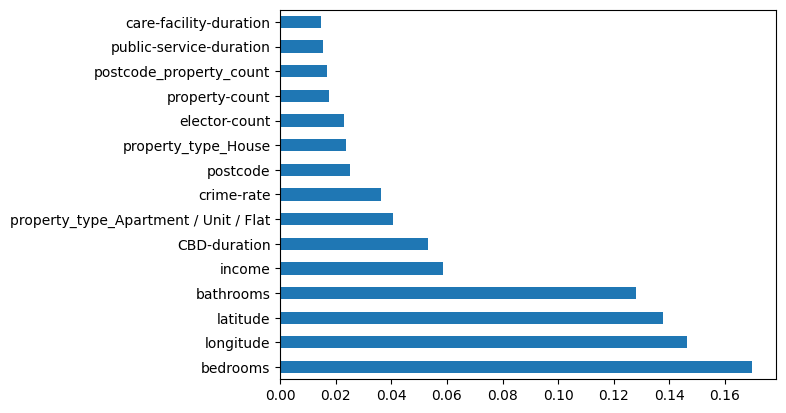

In [19]:
from matplotlib import pyplot as plt

feat_importances = pd.Series(rf.feature_importances_, index=df.columns)
feat_importances.nlargest(15).plot(kind='barh')